In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_table('people.txt')
df

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [3]:
df['Rule1'] = df['Age'].apply(lambda x: True if x>0 and x<=150 else False)
df['Rule1'] 
    

0     True
1     True
2     True
3    False
4     True
Name: Rule1, dtype: bool

In [4]:
df['Rule2'] = df['Age']>df['yearsmarried'] 
df['Rule2'] 

0     True
1     True
2    False
3     True
4     True
Name: Rule2, dtype: bool

In [5]:
df['Rule3'] = df['status'].apply(lambda x: True if x == 'married' or 'single' or 'widowed' else False)
df['Rule3'] 

0    True
1    True
2    True
3    True
4    True
Name: Rule3, dtype: bool

In [6]:
df['Rule4'] = df.apply(lambda x:True if (x.Age<18 and x.agegroup=="child") or (x.Age>=18 and x.Age <65 and x.agegroup=="adult") or (x.Age>=65 and x.agegroup=="elderly") else False,axis=1)
df['Rule4'] 

0     True
1     True
2     True
3     True
4    False
Name: Rule4, dtype: bool

In [7]:
df

,Age,agegroup,height,status,yearsmarried,Rule1,Rule2,Rule3,Rule4
0,21,adult,6.0,single,-1,True,True,True,True
1,2,child,3.0,married,0,True,True,True,True
2,18,adult,5.7,married,20,True,False,True,True
3,221,elderly,5.0,widowed,2,False,True,True,True
4,34,child,-7.0,married,3,True,True,True,False


In [45]:
def ruleset(df):
    df['Violated'] = df.apply(lambda x: True if (x['Rule1'] and x['Rule2'] and x['Rule3'] and x['Rule4']) else False, axis=1)
    print(df['Violated'])

ruleset(df)


0     True
1     True
2    False
3    False
4    False
Name: Violated, dtype: bool


In [52]:
Ruleset = pd.DataFrame({"Rule1" : df['Rule1'], "Rule2" : df['Rule2'], "Rule3" : df['Rule3'], "Rule4" :df['Rule4']})
Ruleset


,Rule1,Rule2,Rule3,Rule4
0,True,True,True,True
1,True,True,True,True
2,True,False,True,True
3,False,True,True,True
4,True,True,True,False


In [53]:
data= Ruleset.apply(lambda x: len(x)-x.sum())
data

Rule1    1
Rule2    1
Rule3    0
Rule4    1
dtype: int64

In [55]:
data.describe()

count    4.00
mean     0.75
std      0.50
min      0.00
25%      0.75
50%      1.00
75%      1.00
max      1.00
dtype: float64

Text(0.5, 1.0, 'RULES VS NO. OF VIOLATIONS')

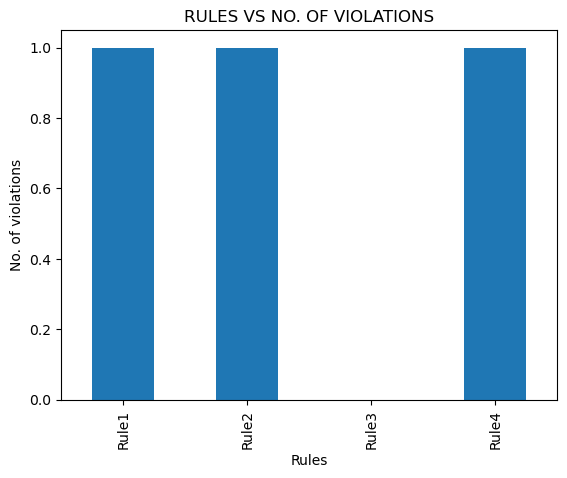

In [56]:
plt.figure()
data.plot(kind="bar")
plt.xlabel("Rules")
plt.ylabel("No. of violations")
plt.title("RULES VS NO. OF VIOLATIONS")